<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-02-17 20:35:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  43.9MB/s    in 3.5s    

2026-02-17 20:35:49 (43.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



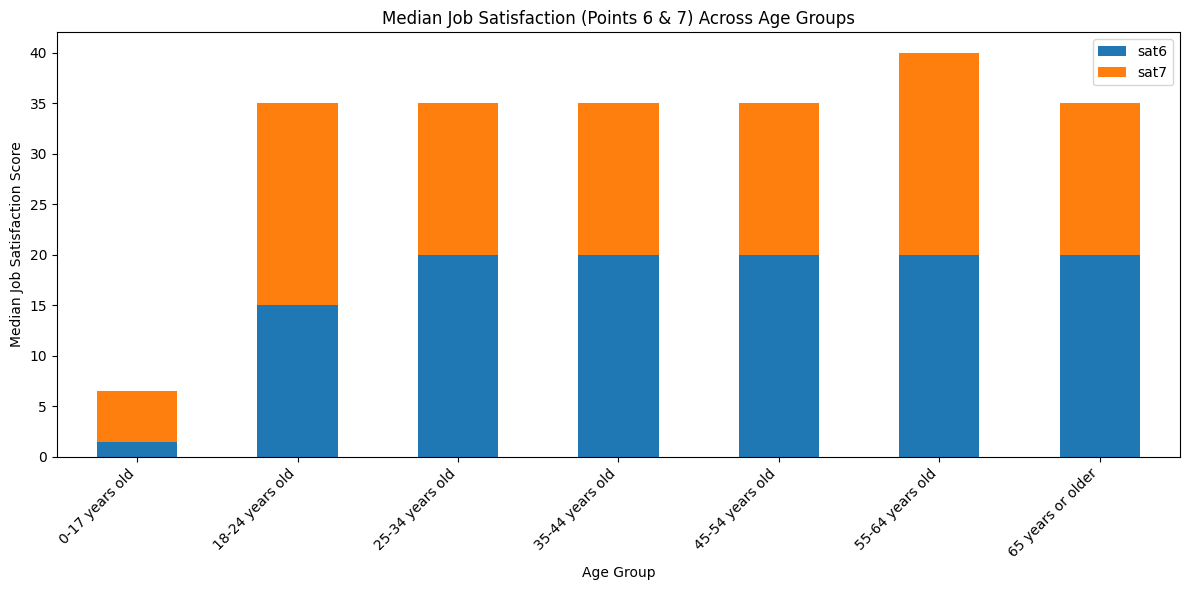

In [7]:
df_median_jobsat = df[['JobSatPoints_6', 'JobSatPoints_7', 'Age']]
df_median_jobsat = df_median_jobsat[df_median_jobsat['Age'] != 'Prefer not to say'] # exclude where no age given

# rename age
df_median_jobsat['Age'] = df_median_jobsat['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})

df_median_jobsat = df_median_jobsat.dropna() # drop nulls

df_median_jobsat = (
    df_median_jobsat
    .groupby("Age")
    .agg(
        sat6=("JobSatPoints_6", "median"),
        sat7=("JobSatPoints_7", "median")
    )
)

# create stacked bar chart
df_median_jobsat.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Score")
plt.title("Median Job Satisfaction (Points 6 & 7) Across Age Groups")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


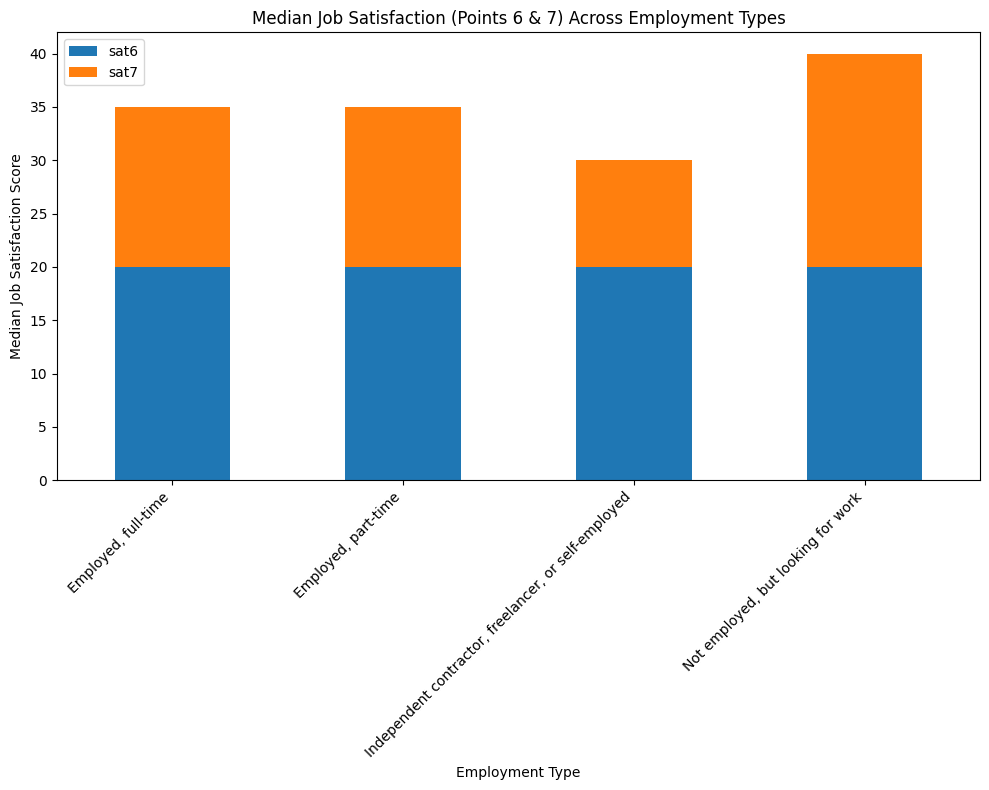

In [8]:
df_jobsat_emp = df[['JobSatPoints_6', 'JobSatPoints_7', 'Employment']]

# split, explode and count data
emp_counts = (
    df_jobsat_emp['Employment']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_jobsat_emp = df_jobsat_emp[df_jobsat_emp['Employment'].isin(emp_counts)] # restrict dataset to top 10 employment types

df_jobsat_emp = df_jobsat_emp.dropna() # drop nulls

df_jobsat_emp = (
    df_jobsat_emp
    .groupby(["Employment"])
    .agg(
        sat6=("JobSatPoints_6", "median"),
        sat7=("JobSatPoints_7", "median")
    )
)

# create stacked bar chart
df_jobsat_emp.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 8)
)

plt.xlabel("Employment Type")
plt.ylabel("Median Job Satisfaction Score")
plt.title("Median Job Satisfaction (Points 6 & 7) Across Employment Types")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


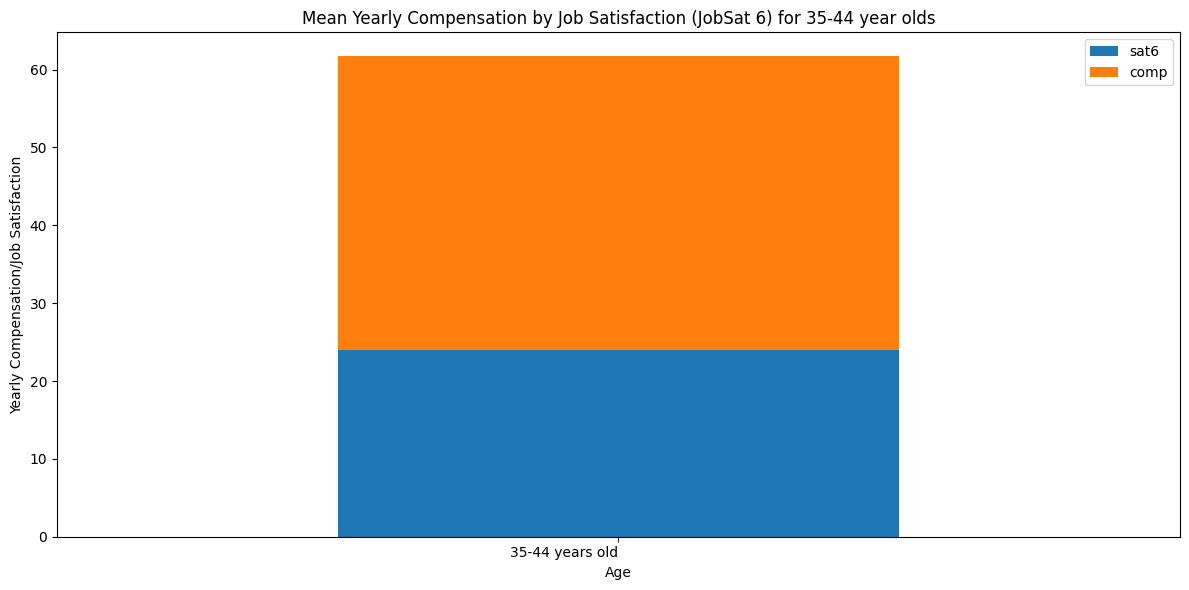

In [9]:
df_jobsat_comp = df[['JobSatPoints_6', 'ConvertedCompYearly', 'Age']]

df_jobsat_comp = df_jobsat_comp[df_jobsat_comp['Age'] == '35-44 years old'] # filter for 35-44 age group

upper = df_jobsat_comp['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_jobsat_comp['ConvertedCompYearly'].quantile(0.75) - df_jobsat_comp['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_jobsat_comp = df_jobsat_comp[df_jobsat_comp['ConvertedCompYearly'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

df_jobsat_comp["Sat_norm"] = (df_jobsat_comp["JobSatPoints_6"] / df_jobsat_comp["JobSatPoints_6"].max()) * 100 # normalise compensation
df_jobsat_comp["Comp_norm"] = (df_jobsat_comp["ConvertedCompYearly"] / df_jobsat_comp["ConvertedCompYearly"].max()) * 100 # normalise compensation

df_jobsat_comp = df_jobsat_comp.dropna() # drop nulls

#df_jobsat_comp
df_jobsat_comp = (
    df_jobsat_comp
    .groupby(["Age"])
    .agg(
        sat6=("Sat_norm", "mean"),
        comp=("Comp_norm", "mean")
    )
)

# create stacked bar chart
df_jobsat_comp.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.ylabel("Yearly Compensation/Job Satisfaction")
plt.title("Mean Yearly Compensation by Job Satisfaction (JobSat 6) for 35-44 year olds")
plt.xticks(rotation=0, ha="right")
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


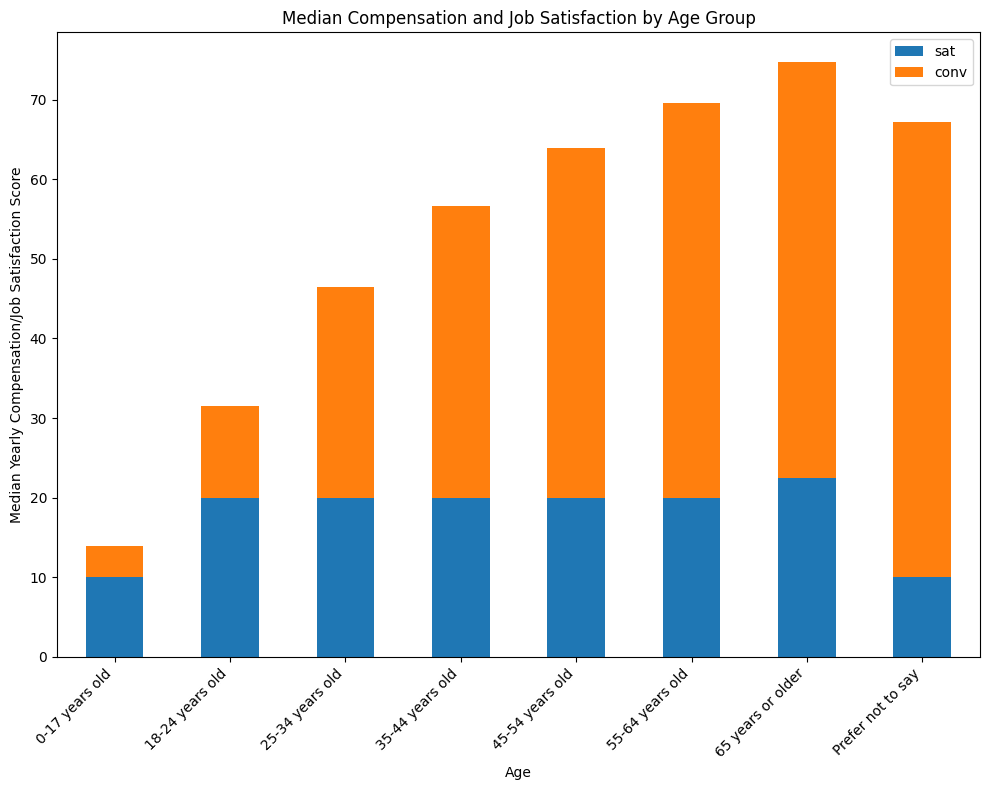

In [10]:
df_conv_sat = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']]

# rename age
df_conv_sat['Age'] = df_conv_sat['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})

upper = df_conv_sat['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_conv_sat['ConvertedCompYearly'].quantile(0.75) - df_conv_sat['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_conv_sat = df_conv_sat[df_conv_sat['ConvertedCompYearly'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

df_conv_sat = df_conv_sat.dropna() # drop nulls

df_conv_sat["Comp_norm"] = (df_conv_sat["ConvertedCompYearly"] / df_conv_sat["ConvertedCompYearly"].max()) * 100 # normalise job satisfaction
df_conv_sat["JobSat_norm"] = (df_conv_sat["JobSatPoints_6"] / df_conv_sat["JobSatPoints_6"].max()) * 100 # normalise compensation

df_conv_sat = (
    df_conv_sat
    .groupby(["Age"])
    .agg(
        sat=("JobSat_norm", "median"),
        conv=("Comp_norm", "median")
    )
)

# create stacked bar chart
df_conv_sat.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 8)
)

plt.xlabel("Age")
plt.ylabel("Median Yearly Compensation/Job Satisfaction Score")
plt.title("Median Compensation and Job Satisfaction by Age Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


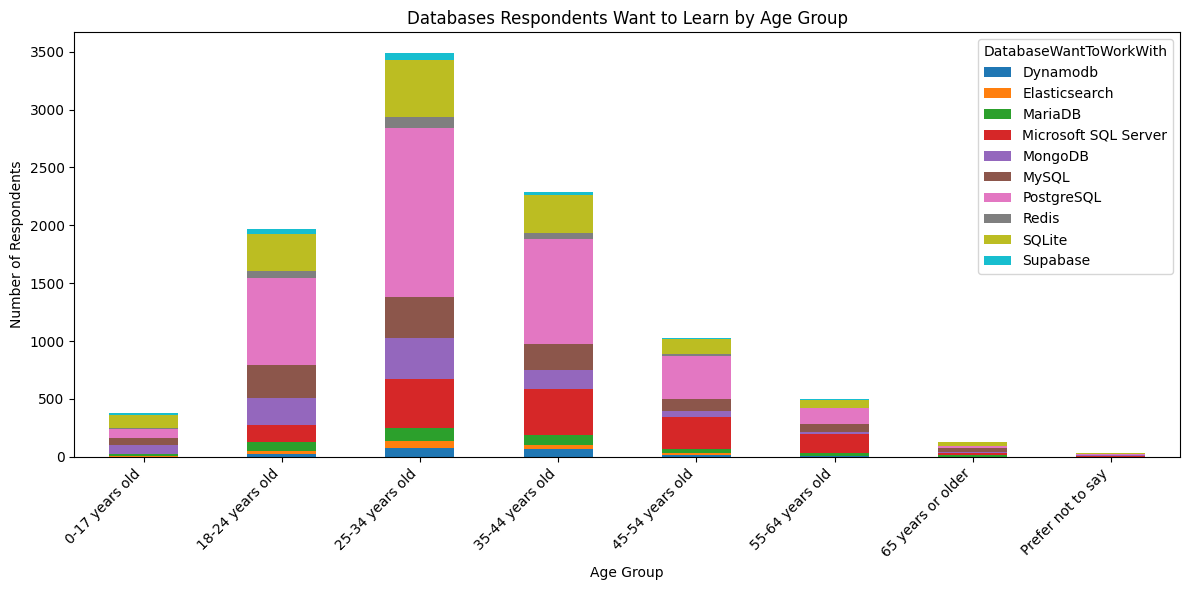

In [11]:
df_db_age = df[['DatabaseWantToWorkWith', 'Age']]

# rename age
df_db_age['Age'] = df_db_age['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})
#df_db_age
# split, explode and count languages
db_count = (
    df_db_age['DatabaseWantToWorkWith']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_db_age = df_db_age[df_db_age['DatabaseWantToWorkWith'].isin(db_count)] # retain top 10 languages

#count database prefereces by age group
df_db_age = (
    df_db_age
    .groupby(["Age", "DatabaseWantToWorkWith"])
    .size()
    .reset_index(name="count")
)

# pivot data for stacked chart
df_db_age = df_db_age.pivot(
    index="Age",
    columns="DatabaseWantToWorkWith",
    values="count"
).fillna(0)

# create stacked bar chart
df_db_age.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6)
)

plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.title("Databases Respondents Want to Learn by Age Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


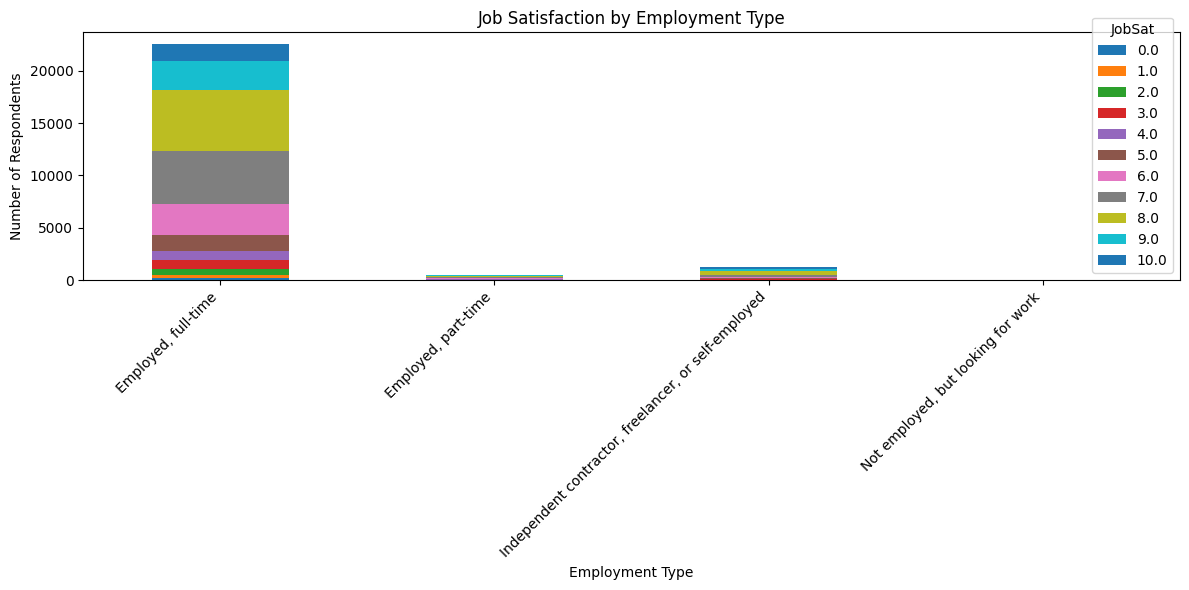

In [12]:
df_emp_sat = df[['Employment', 'JobSat']]

# split, explode and count languages
emp_count = (
    df_emp_sat['Employment']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_emp_sat = df_emp_sat[df_emp_sat['Employment'].isin(emp_count)] # retain top 10 languages

# count employment type by job satisfaction
df_emp_sat = (
    df_emp_sat
    .groupby(['Employment', 'JobSat'])
    .size()
    .reset_index(name="count")
)

# pivot data for stacked chart
df_emp_sat = df_emp_sat.pivot(
    index="Employment",
    columns="JobSat",
    values="count"
).fillna(0)

# create stacked bar chart
df_emp_sat.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6)
)

plt.xlabel("Employment Type")
plt.ylabel("Number of Respondents")
plt.title("Job Satisfaction by Employment Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


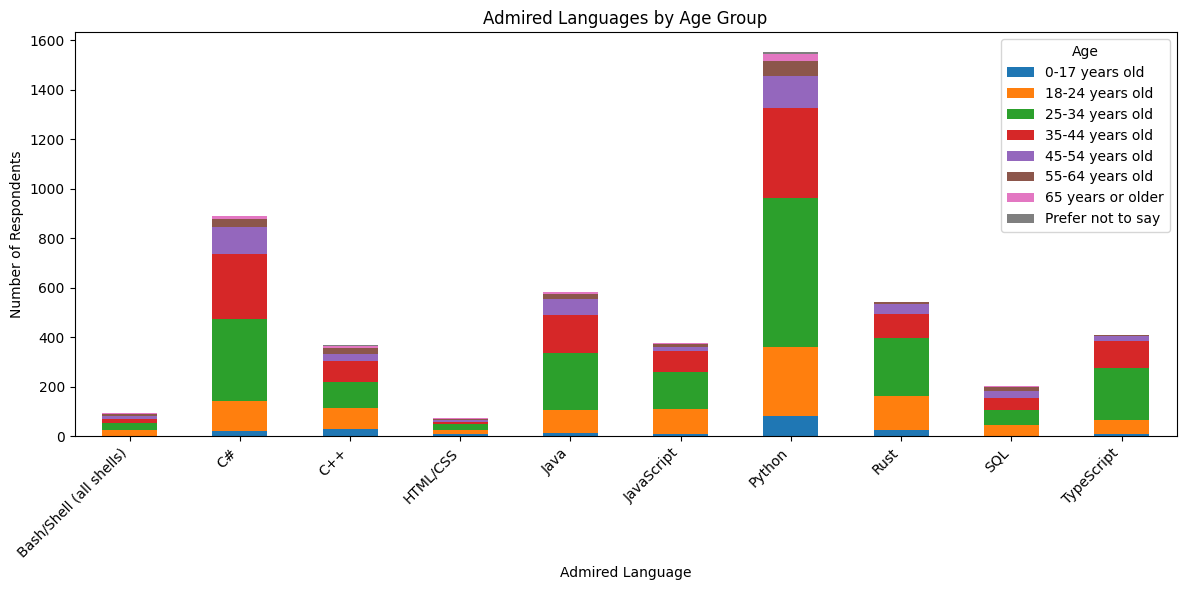

In [13]:
df_admired_age = df[['LanguageAdmired', 'Age']]

df_admired_age['Age'] = df_admired_age['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})

# split, explode and count languages
admired_count = (
    df_admired_age['LanguageAdmired']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_admired_age = df_admired_age[df_admired_age['LanguageAdmired'].isin(admired_count)] # retain top 10 languages

# count employment type by job satisfaction
df_admired_age = (
    df_admired_age
    .groupby(['LanguageAdmired', 'Age'])
    .size()
    .reset_index(name="count")
)

# pivot data for stacked chart
df_admired_age = df_admired_age.pivot(
    index="LanguageAdmired",
    columns="Age",
    values="count"
).fillna(0)

# create stacked bar chart
df_admired_age.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6)
)

plt.xlabel("Admired Language")
plt.ylabel("Number of Respondents")
plt.title("Admired Languages by Age Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


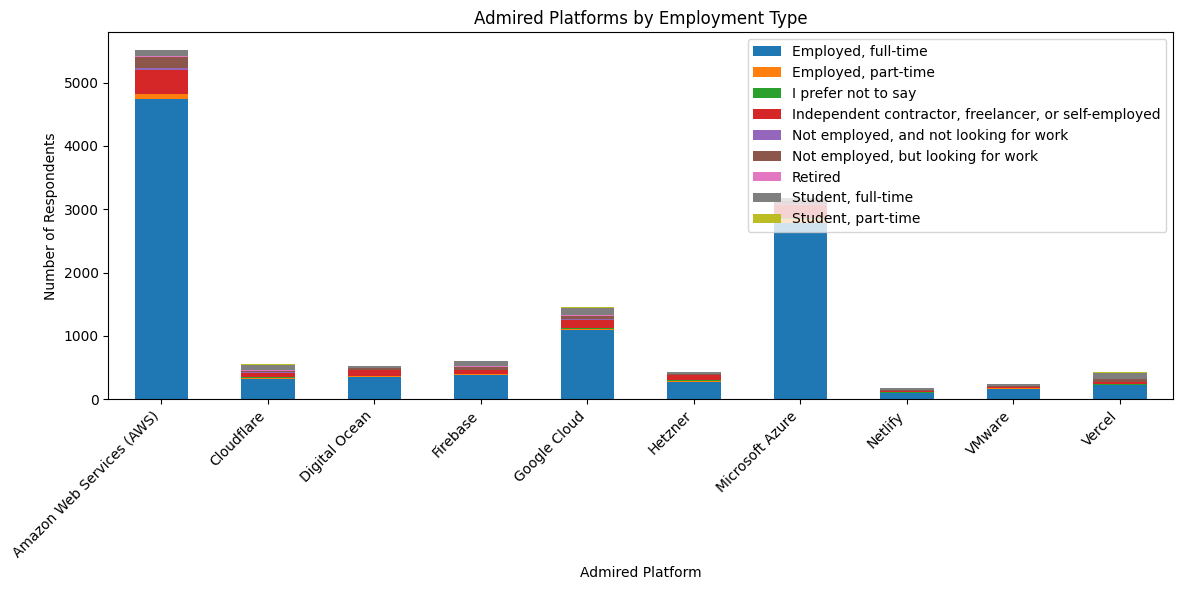

In [14]:
df_admired_emp = df[['PlatformAdmired', 'Employment']]

# split, explode and count platforms
admired_platform_count = (
    df_admired_emp['PlatformAdmired']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_admired_emp = df_admired_emp[df_admired_emp['PlatformAdmired'].isin(admired_platform_count)] # retain top 10 languages

# split, explode and count employment types
emp_count = (
    df_admired_emp['Employment']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(10)
    .index
)

df_admired_emp = df_admired_emp[df_admired_emp['Employment'].isin(emp_count)] # retain top 10 languages

# count platform admired by employment type
df_admired_emp = (
    df_admired_emp
    .groupby(['PlatformAdmired', 'Employment'])
    .size()
    .reset_index(name="count")
)

# pivot data for stacked chart
df_admired_emp = df_admired_emp.pivot(
    index="PlatformAdmired",
    columns="Employment",
    values="count"
).fillna(0)

# create stacked bar chart
df_admired_emp.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6)
)

plt.xlabel("Admired Platform")
plt.ylabel("Number of Respondents")
plt.title("Admired Platforms by Employment Type")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
